In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

### Loading dataset

In [2]:
df = pd.read_csv("Message_Data_Spam (1).csv",encoding="Latin_1")

In [3]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.iloc[1,1]

'Ok lar... Joking wif u oni...'

### Rename columns

In [6]:
df.rename(columns={"v1":"Label","v2":"Message"},inplace = True)

In [7]:
df

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.replace({"ham":0,"spam":1},inplace = True)

In [9]:
df

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
df["Label"].value_counts()

0    4825
1     747
Name: Label, dtype: int64

### Checking null values

In [11]:
df.isnull().sum()

Label      0
Message    0
dtype: int64

In [12]:
df.describe(include="all")

,Label,Message
count,5572.000000,5572
unique,NaN,5169
top,NaN,"Sorry, I'll call later"
freq,NaN,30
mean,0.134063,NaN
std,0.340751,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,0.000000,NaN
75%,0.000000,NaN


In [13]:
df.dtypes

Label       int64
Message    object
dtype: object

### Check for duplicates

In [13]:
df1 = df[df.duplicated()]

In [14]:
df1["Label"].value_counts()
df1

,Label,Message
102,0,As per your request 'Melle Melle (Oru Minnamin...
153,0,As per your request 'Melle Melle (Oru Minnamin...
206,0,"As I entered my cabin my PA said, '' Happy B'd..."
222,0,"Sorry, I'll call later"
325,0,No calls..messages..missed calls
...,...,...
5524,1,You are awarded a SiPix Digital Camera! call 0...
5535,0,"I know you are thinkin malaria. But relax, chi..."
5539,0,Just sleeping..and surfing
5553,0,Hahaha..use your brain dear


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### Bar chart 

<Axes: >

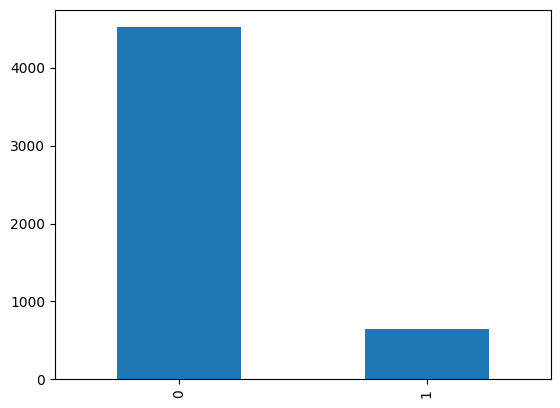

In [17]:
df.Label.value_counts().plot(kind = "bar")

# Terminology :

Corpus : collection of all text in documents
Documents : collection of sentences
Sentences : collection of words/tokens
Tokens : stemming,normalise(lowercase, uppercase), punctuation, lemmatisation 

In [18]:
df["Length"] = df['Message'].str.len()

In [19]:
df

,Label,Message,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


<Axes: ylabel='Frequency'>

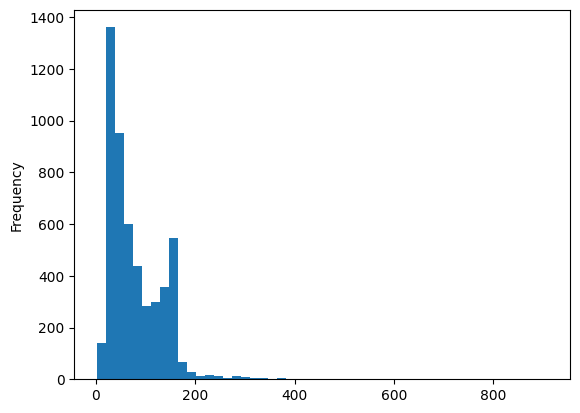

In [20]:
df["Length"].plot(bins = 50,kind = "hist")

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

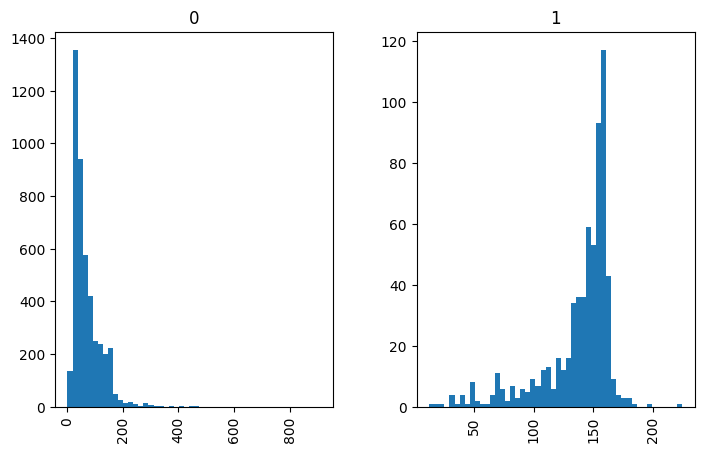

In [21]:
df.hist(column = "Length" , by = "Label",bins = 50,figsize = (8,5))

In [22]:
df

,Label,Message,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


### Text Processing

In [23]:
# converting words to lowercase
df["Message"] = df["Message"].str.lower()

In [24]:
df

,Label,Message,Length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,161
5568,0,will ì_ b going to esplanade fr home?,37
5569,0,"pity, * was in mood for that. so...any other s...",57
5570,0,the guy did some bitching but i acted like i'd...,125


In [25]:
# remove punctuation # remove numbers 
import re
s = "My! name is Mansi Jain?"
s1 = re.sub("[^A-Za-z0-9\s]","",s)
s1


'My name is Mansi Jain'

In [26]:
# remove punctuation and special characters
df["Message"] = df["Message"].apply(lambda x: re.sub("[^A-Za-z0-9\s]","",x))

In [27]:
df["Message"]

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                   will  b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: Message, Length: 5169, dtype: object

In [28]:
import nltk

In [29]:
nltk.download(["stopwords"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mansi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
stopwords = nltk.corpus.stopwords.words("english")

In [31]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
#example 
s5 = "I'm going to gym in Bengaluru at 4:15pm"


In [33]:
for i in s5.split(" "):
    if i in stopwords:
        s5 = s5.replace(i,"")
print(s5)

I'm gog  gym  Bengaluru  4:15pm


In [34]:
# remove stopwords
df["Message"] = df["Message"].apply(lambda x: (" ").join([i for i in x.split() if i not in stopwords]))

In [35]:
df["Message"]

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u 750 pound prize 2...
5568                            b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: Message, Length: 5169, dtype: object

In [36]:
list(df["Message"].str.split())

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  '2',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  '87121',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'ratetcs',
  'apply',
  '08452810075over18s'],
 ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'],
 ['nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  '3',
  'weeks',
  'word',
  'back',
  'id',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  '150',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'callers',
  'pres

In [37]:
# Term frequency
tf=pd.Series(' '.join(df['Message']).split()).value_counts()

In [38]:
tf

u           1001
call         487
im           456
2            443
get          364
            ... 
terry          1
tue            1
walsall        1
parts          1
bitching       1
Length: 9346, dtype: int64

In [39]:
# least frequncy words
l_f =pd.Series(' '.join(df['Message']).split()).value_counts().tail(50)

In [40]:
l_f

650                1
850                1
matric             1
september          1
cheek              1
prominent          1
50award            1
blessget           1
traveling          1
honest             1
stable             1
afghanistan        1
iraq               1
fake               1
learned            1
wwwwin82050couk    1
prizes             1
foley              1
careabout          1
urmomi             1
itried2tell        1
iwasmarinethats    1
intend             1
4ui                1
transfr            1
tvlol              1
1225               1
pai                1
hottest            1
seh                1
mwahs              1
squishy            1
usmle              1
aid                1
bam                1
yould              1
dec                1
teresa             1
lifting            1
dying              1
somethings         1
fellow             1
3db                1
shrek              1
ccna               1
terry              1
tue                1
walsall      

In [41]:
df["Message"] = df["Message"].apply(lambda x : " ".join(i for i in x.split() if i not in l_f))

In [42]:
df

,Label,Message,Length
0,0,go jurong point crazy available bugis n great ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry 2 wkly comp win fa cup final tkts 2...,155
3,0,u dun say early hor u c already say,49
4,0,nah dont think goes usf lives around though,61
...,...,...,...
5567,1,2nd time tried 2 contact u u 750 pound prize 2...,161
5568,0,b going esplanade fr home,37
5569,0,pity mood soany suggestions,57
5570,0,guy acted like id interested buying something ...,125


In [43]:
# remove most used words
m_f =pd.Series(' '.join(df['Message']).split()).value_counts().head(5)

In [44]:
m_f

u       1001
call     487
im       456
2        443
get      364
dtype: int64

In [45]:
df["Message"] = df["Message"].apply(lambda x : " ".join(i for i in x.split() if i not in m_f))

In [46]:
df

,Label,Message,Length
0,0,go jurong point crazy available bugis n great ...,111
1,0,ok lar joking wif oni,29
2,1,free entry wkly comp win fa cup final tkts 21s...,155
3,0,dun say early hor c already say,49
4,0,nah dont think goes usf lives around though,61
...,...,...,...
5567,1,2nd time tried contact 750 pound prize claim e...,161
5568,0,b going esplanade fr home,37
5569,0,pity mood soany suggestions,57
5570,0,guy acted like id interested buying something ...,125


In [47]:
# import stemmer
from nltk.stem import PorterStemmer
st  =PorterStemmer()

In [48]:
# write, written,wrote,writing
# alumni, alumnus , alumnae

In [49]:
[st.stem(i) for i in ["alumni", "alumnus" , "alumnae"]]

['alumni', 'alumnu', 'alumna']

In [50]:
[st.stem(i) for i in [" write", "written" ,"wrote","writing"]]

[' write', 'written', 'wrote', 'write']

In [51]:
df["Message"] = df["Message"].apply(lambda x : " ".join(st.stem(i) for i in x.split()))   

In [52]:
df["Message"]

0       go jurong point crazi avail bugi n great world...
1                                     ok lar joke wif oni
2       free entri wkli comp win fa cup final tkt 21st...
3                         dun say earli hor c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri contact 750 pound prize claim eas...
5568                                b go esplanad fr home
5569                              piti mood soani suggest
5570    guy act like id interest buy someth els next w...
5571                                       rofl true name
Name: Message, Length: 5169, dtype: object

In [53]:
# lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mansi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [54]:
lem = WordNetLemmatizer()

In [55]:
df["Message"] = df["Message"].apply(lambda x : " ".join(lem.lemmatize(i) for i in x.split())) 

In [56]:
df["Message"]

0       go jurong point crazi avail bugi n great world...
1                                     ok lar joke wif oni
2       free entri wkli comp win fa cup final tkt 21st...
3                         dun say earli hor c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri contact 750 pound prize claim eas...
5568                                b go esplanad fr home
5569                              piti mood soani suggest
5570    guy act like id interest buy someth el next we...
5571                                       rofl true name
Name: Message, Length: 5169, dtype: object

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

In [58]:
x = df["Message"]
y = df["Label"]

In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)


In [60]:
x_train

2176                                    readi moan scream
343                                         interest like
245                   late said websit didnt dont slipper
1281                              one doesnt stalk profil
1382          ok arm feel weak cuz got shot go anoth time
                              ...                        
4784    urgent 09066649731from landlin complimentari 4...
2049                        much blackberri bold2 nigeria
4371    ur balanc 600 next question complet landmark b...
1974                                        that cool cum
4148    havent found way anoth app phone eh go net caf...
Name: Message, Length: 3876, dtype: object

In [61]:
x_train_cv = cv.fit_transform(x_train)

In [62]:
x_test_cv = cv.transform(x_test)

In [ ]:
# classification - logistics, Decision Tree, Random Forest

### Logistic Regression used

In [63]:
from sklearn .linear_model import LogisticRegression
Lr = LogisticRegression()

In [64]:
Lr.fit(x_train_cv,y_train)

LogisticRegression()

In [65]:
Lr.predict(x_test_cv)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

### Evaluation Metrics

In [66]:
from sklearn.metrics import accuracy_score, f1_score , precision_score, recall_score

print(metrics.accuracy_score(y_test,Lr.predict(x_test_cv)))
print(metrics.f1_score(y_test,Lr.predict(x_test_cv)))
print(metrics.precision_score(y_test,Lr.predict(x_test_cv)))
print(metrics.recall_score(y_test,Lr.predict(x_test_cv)))

0.9737045630317092
0.8843537414965986
0.9923664122137404
0.7975460122699386


In [67]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test,Lr.predict(x_test_cv)) , index=["Actual_1","Actual_0"], columns = ["Predict_1","Predict_0"])

In [68]:
cm

,Predict_1,Predict_0
Actual_1,1129,1
Actual_0,33,130


### Heatmap

<Axes: >

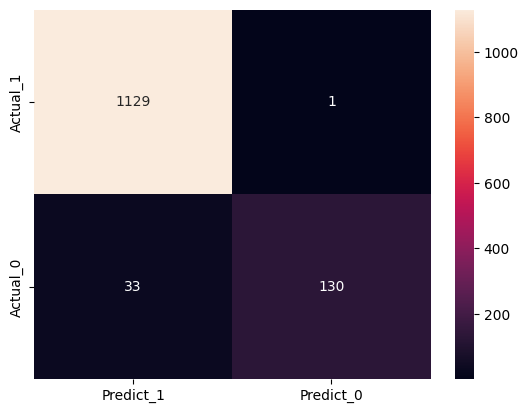

In [69]:
sns.heatmap(cm,annot = True, fmt = "g")